In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
directory_path = '/content/drive/MyDrive/PlantVillage'


In [4]:
class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
def load_images_and_labels(folder, class_names, target_size=(224, 224)):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(folder, class_name)
        class_images = os.listdir(class_folder)
        # Take the first 'n' images from each class for testing, where 'n' is the number of images in the smallest class
        test_images = class_images[:min(len(class_images), len(os.listdir(os.path.join(folder, class_names[0]))))]
        for filename in class_images:
            img = cv2.imread(os.path.join(class_folder, filename))
            if img is not None:
                img = cv2.resize(img, target_size)
                images.append(img)
                labels.append(class_names.index(class_name) + 1)  # Assigning labels as 1, 2, 3
    return np.array(images), np.array(labels)

In [6]:
# Load images and labels from the PlantVillage dataset
X, y = load_images_and_labels(directory_path, class_names)

In [7]:
# Normalize images (assuming pixel values are in the range 0-255)
X = X / 255.0

In [8]:
# Split the dataset into training and testing sets while maintaining the same number of images for each class in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:

# Normalize images (assuming pixel values are in the range 0-255)
X = np.array(X) / 255.0

In [10]:
# Split the dataset into training and testing sets while maintaining the same number of images for each class in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Print the shapes of the resulting datasets
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)

Training Set: (1723, 224, 224, 3) (1723,)
Testing Set: (431, 224, 224, 3) (431,)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [13]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, cm

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression:
Accuracy: 0.8329466357308585
Precision: 0.77917268557364
Recall: 0.8329466357308585
F1 Score: 0.8039039271289852


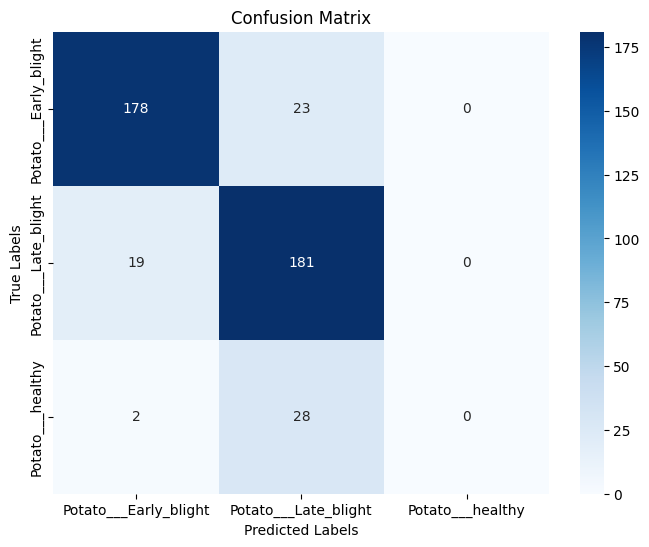

In [14]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train.reshape(X_train.shape[0], -1), y_train)
lr_accuracy, lr_precision, lr_recall, lr_f1, lr_cm = evaluate_model(lr, X_test.reshape(X_test.shape[0], -1), y_test)
print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)
plot_confusion_matrix(lr_cm, labels=class_names)


Support Vector Machines (SVM):
Accuracy: 0.925754060324826
Precision: 0.9267788330496908
Recall: 0.925754060324826
F1 Score: 0.9160951515157244


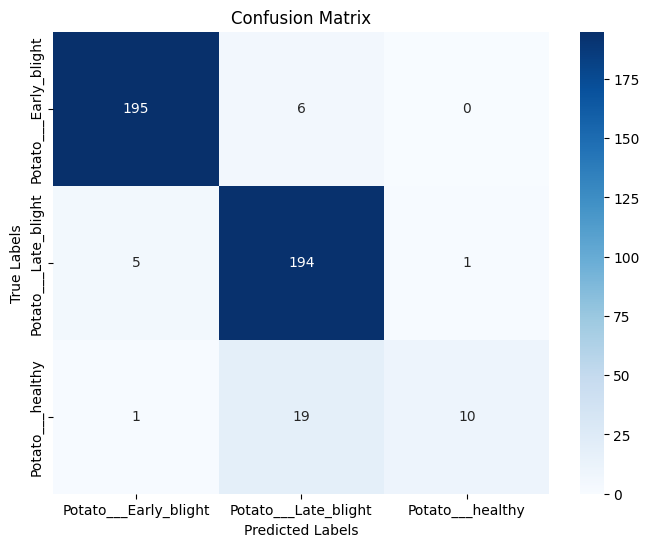

In [15]:
# Support Vector Machines (SVM)
svm = SVC()
svm.fit(X_train.reshape(X_train.shape[0], -1), y_train)
svm_accuracy, svm_precision, svm_recall, svm_f1, svm_cm = evaluate_model(svm, X_test.reshape(X_test.shape[0], -1), y_test)
print("\nSupport Vector Machines (SVM):")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
plot_confusion_matrix(svm_cm, labels=class_names)


Random Forest:
Accuracy: 0.8723897911832946
Precision: 0.8810554146657315
Recall: 0.8723897911832946
F1 Score: 0.8442273278660404


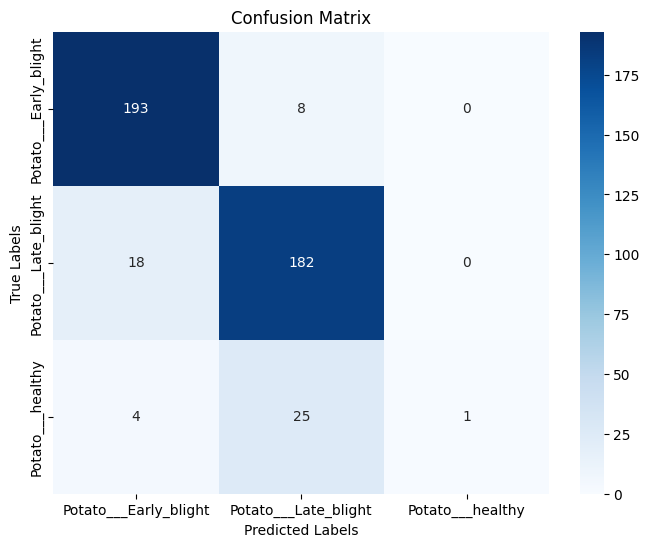

In [16]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train.reshape(X_train.shape[0], -1), y_train)
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_cm = evaluate_model(rf, X_test.reshape(X_test.shape[0], -1), y_test)
print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
plot_confusion_matrix(rf_cm, labels=class_names)


Nearest Centroid Classifier:
Accuracy: 0.777262180974478
Precision: 0.8300394508573178
Recall: 0.777262180974478
F1 Score: 0.7973238921469701


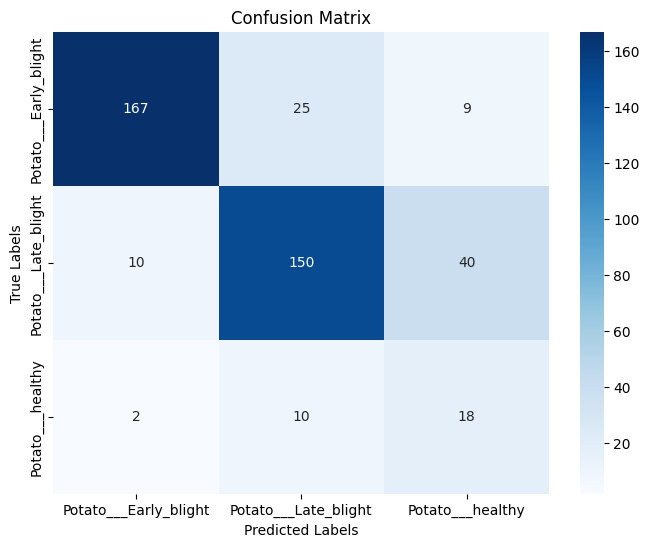

In [19]:
from sklearn.neighbors import NearestCentroid

# Nearest Centroid Classifier
nc = NearestCentroid()
nc.fit(X_train.reshape(X_train.shape[0], -1), y_train)
nc_accuracy, nc_precision, nc_recall, nc_f1, nc_cm = evaluate_model(nc, X_test.reshape(X_test.shape[0], -1), y_test)
print("\nNearest Centroid Classifier:")
print("Accuracy:", nc_accuracy)
print("Precision:", nc_precision)
print("Recall:", nc_recall)
print("F1 Score:", nc_f1)
plot_confusion_matrix(nc_cm, labels=class_names)


Naive Bayes Classifier:
Accuracy: 0.8329466357308585
Precision: 0.8616794394056574
Recall: 0.8329466357308585
F1 Score: 0.8427915570631669


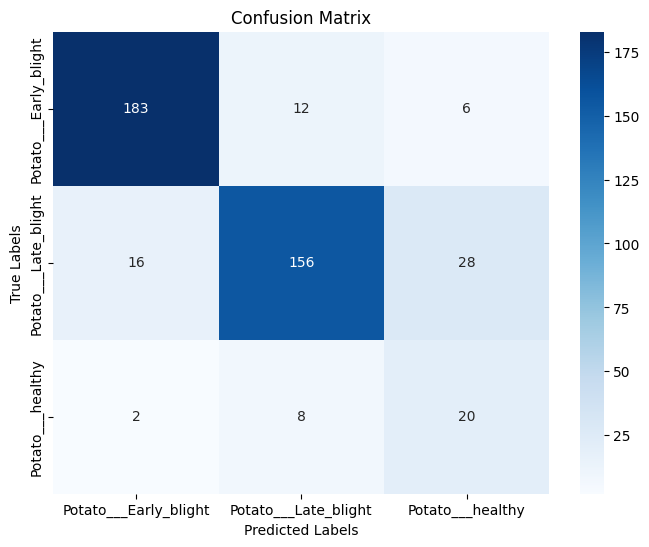

In [20]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train.reshape(X_train.shape[0], -1), y_train)
nb_accuracy, nb_precision, nb_recall, nb_f1, nb_cm = evaluate_model(nb, X_test.reshape(X_test.shape[0], -1), y_test)
print("\nNaive Bayes Classifier:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)
plot_confusion_matrix(nb_cm, labels=class_names)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary to store evaluation metrics for each model (excluding XGBoost)
metrics_dict = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'Nearest Centroid', 'Naive Bayes'],
    'Accuracy': [lr_accuracy, svm_accuracy, rf_accuracy, nc_accuracy, nb_accuracy],
    'Precision': [lr_precision, svm_precision, rf_precision, nc_precision, nb_precision],
    'Recall': [lr_recall, svm_recall, rf_recall, nc_recall, nb_recall],
    'F1 Score': [lr_f1, svm_f1, rf_f1, nc_f1, nb_f1]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Sort the DataFrame by F1 Score in descending order
metrics_df_sorted = metrics_df.sort_values(by='F1 Score', ascending=False)

# Display the sorted DataFrame
print(metrics_df_sorted)

                 Model  Accuracy  Precision    Recall  F1 Score
1                  SVM  0.925754   0.926779  0.925754  0.916095
2        Random Forest  0.872390   0.881055  0.872390  0.844227
4          Naive Bayes  0.832947   0.861679  0.832947  0.842792
0  Logistic Regression  0.832947   0.779173  0.832947  0.803904
3     Nearest Centroid  0.777262   0.830039  0.777262  0.797324


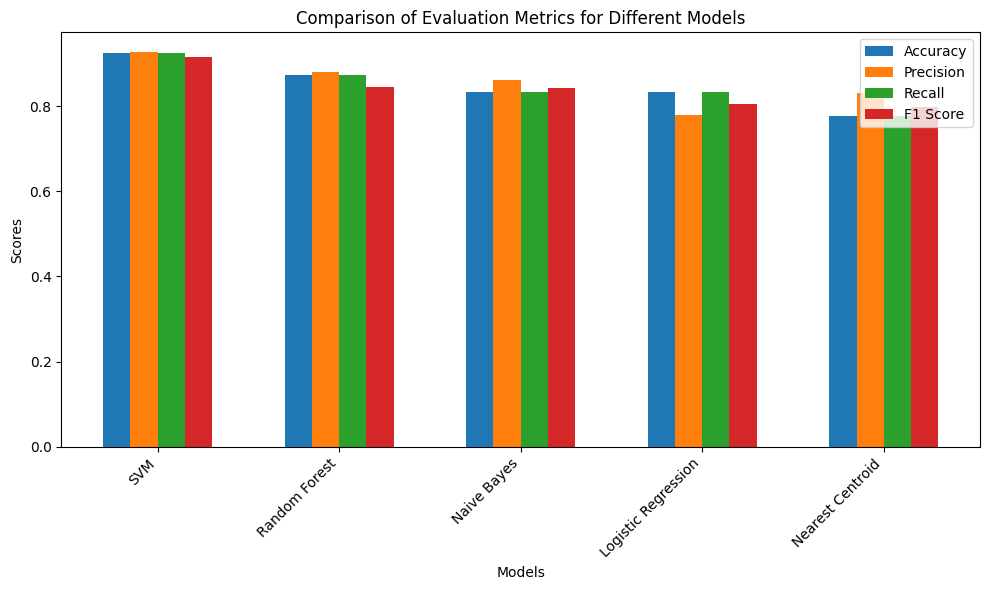

In [22]:
# Plotting
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.15

# Index for x-axis
index = np.arange(len(metrics_df_sorted))

# Plot bars for each metric
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score']):
    plt.bar(index + i * bar_width, metrics_df_sorted[metric], bar_width, label=metric)

# Set x-axis labels
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Evaluation Metrics for Different Models')
plt.xticks(index + 1.5 * bar_width, metrics_df_sorted['Model'], rotation=45, ha='right')

# Add legend
plt.legend()
plt.tight_layout()
plt.show()